# Importing libraries and reading fie

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [18]:
dataset = pd.read_csv('weatherHistory.csv') #reading in csv file

# Exploring dataset

In [19]:
print(dataset.shape) #number of columns and rows

(96453, 12)


In [20]:
print(dataset.describe()) #statiscial detail of dataset

       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   


# Visualising dataset

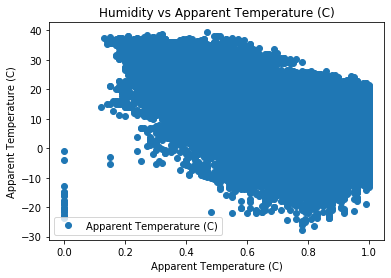

In [21]:
dataset.plot(x='Humidity', y='Apparent Temperature (C)', style='o')
plt.title('Humidity vs Apparent Temperature (C)')
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.show() #scatter graph showing relationship

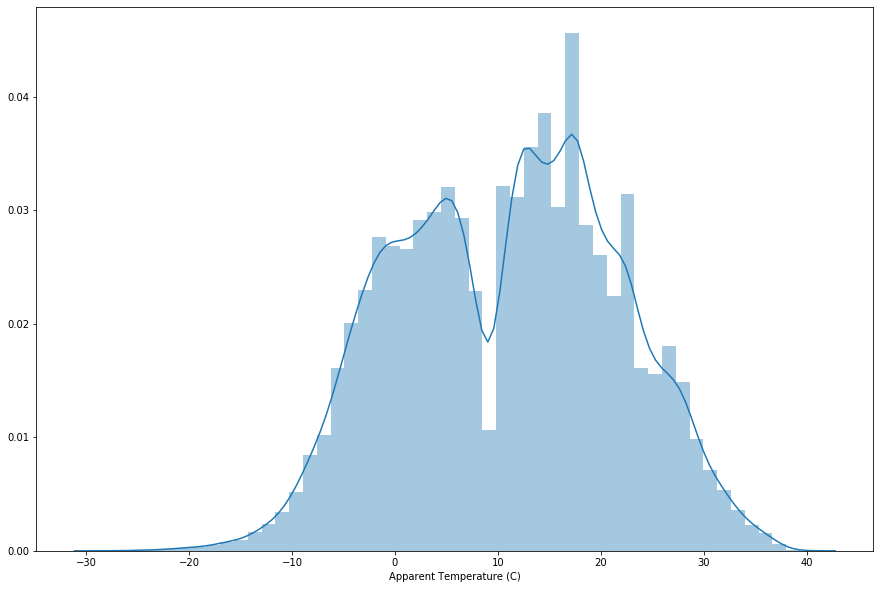

In [22]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Apparent Temperature (C)']) 
#calculating average Apparent Temperature (C)

# Coding model

In [23]:
X = dataset['Humidity'].values.reshape(-1,1)
y = dataset['Apparent Temperature (C)'].values.reshape(-1,1)
#setting axis

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#splitting out training data

In [25]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) 
#training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#To retrieve the intercept: 
print(regressor.intercept_)
#To retrievethe slope:
print(regressor.coef_)

[35.14500169]
[[-33.05962143]]


In [27]:
y_pred = regressor.predict(X_test) #percentage score

# Visualising results

In [28]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted':
y_pred.flatten()})
print(df) #list of actual vs predicted

          Actual  Predicted
0      14.422222   4.399554
1      12.155556  11.342074
2      23.961111  14.978633
3      15.000000   6.383131
4      12.800000   9.689093
...          ...        ...
19286  28.255556  22.912942
19287  17.216667   4.399554
19288  -1.000000   4.730150
19289   7.327778   4.399554
19290  16.061111  11.342074

[19291 rows x 2 columns]


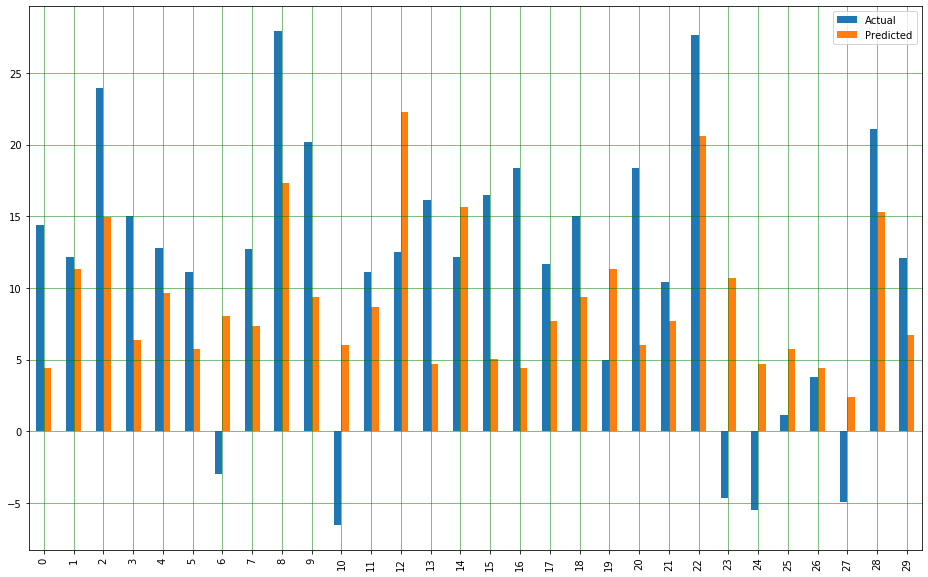

In [29]:
df1 = df.head(30)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show() #first 30 rows of actual vs predicted

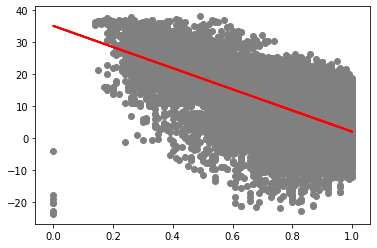

In [30]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show() #plot line through test data

# Evaluating results

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #printing mean absolute error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) #printing mean squared error
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #printing root mean squared error

Mean Absolute Error: 6.943505877296676
Mean Squared Error: 72.90295726691461
Root Mean Squared Error: 8.538322860311304


# Conclusion

In [16]:
1.	Is there a relationship between Humidity and Apparent Temperature?
It would appear there is a strong positive correlation when predicting humidity using apparent temperature

2.	Can we predict the Apparent Temperature using Humidity?
No we cannot predict it apparent temperature using humidity